# Data Dictionary
**Variable** Meaning	Levels</br>
**Age**	Age of the employee	</br>
**Attrition**	Whether the employee left in the previous year or not	</br>
**BusinessTravel**	How frequently the employees travelled for business purposes in the last year	</br>
**Department**	Department in company	</br>
**DistanceFromHome**	Distance from home in kms	</br>
**Education**	Education Level</br>
        1 'Below College'
		2 'College'
		3 'Bachelor'
		4 'Master'
		5 'Doctor'</br>
**EducationField**	Field of education	</br>
**EmployeeCount**	Employee count	</br>
**EmployeeNumber**	Employee number/id	</br>
**EnvironmentSatisfaction**	Work Environment Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**Gender**	Gender of employee	</br>
**JobInvolvement**	Job Involvement Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**JobLevel**	Job level at company on a scale of 1 to 5	</br>
**JobRole**	Name of job role in company	</br>
**JobSatisfaction**	Job Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**MaritalStatus**	Marital status of the employee	</br>
**MonthlyIncome**	Monthly income in rupees per month	</br>
**NumCompaniesWorked**	Total number of companies the employee has worked for	</br>
**Over18**	Whether the employee is above 18 years of age or not	</br>
**PercentSalaryHike**	Percent salary hike for last year	</br>
**PerformanceRating**	Performance rating for last year	</br>
        1 'Low'
		2 'Good'
		3 'Excellent'
		4 'Outstanding'</br>
**RelationshipSatisfaction**	Relationship satisfaction level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**StandardHours**	Standard hours of work for the employee	</br>
**StockOptionLevel**	Stock option level of the employee	</br>
**TotalWorkingYears**	Total number of years the employee has worked so far	</br>
**TrainingTimesLastYear**	Number of times training was conducted for this employee last year	</br>
**WorkLifeBalance**	Work life balance level	</br>
        1 'Bad'
		2 'Good'
		3 'Better'
		4 'Best'</br>
**YearsAtCompany**	Total number of years spent at the company by the employee	
**YearsSinceLastPromotion**	Number of years since last promotion	
**YearsWithCurrManager**	Number of years under current manager	

In [9]:
# Common imports
import sqlite3
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set()
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [10]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [11]:
conn = sqlite3.connect("data/hr_data.db")
employee_survey = pd.read_sql_query("select * from employee_survey_data", conn)
general_data = pd.read_sql_query("select * from general_data", conn)
manager_survey = pd.read_sql_query("select * from manager_survey_data", conn)
in_time = pd.read_sql_query("select * from in_time", conn)
out_time = pd.read_sql_query("select * from out_time", conn)

In [12]:
general_data['MonthlyIncome'].head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [13]:
general_data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [14]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null object
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-nu

In [15]:
general_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0
StockOptionLevel,4410.0,0.793878,0.851883,0.0,0.00,1.0,1.00,3.0


In [16]:
## Monthly salaries are in rupees 'INR'
from forex_python.converter import CurrencyRates

In [17]:
c = CurrencyRates()
c.get_rates('USD')

{'GBP': 0.8217052179,
 'HKD': 7.8231127847,
 'IDR': 14020.0017930787,
 'ILS': 3.4908552985,
 'DKK': 6.694100771,
 'INR': 68.8161197777,
 'CHF': 0.9896001434,
 'MXN': 19.0458131612,
 'CZK': 22.9962345347,
 'SGD': 1.370181101,
 'THB': 30.8050923436,
 'HRK': 6.6170880402,
 'EUR': 0.8965393581,
 'MYR': 4.1249775865,
 'NOK': 8.7294244217,
 'CNY': 6.8819257665,
 'BGN': 1.7534516765,
 'PHP': 50.8346781424,
 'PLN': 3.8472296934,
 'ZAR': 14.1474807244,
 'CAD': 1.317105971,
 'ISK': 121.1224672763,
 'BRL': 3.7867132867,
 'RON': 4.2425138964,
 'NZD': 1.511117088,
 'TRY': 5.5589922898,
 'JPY': 108.4812623274,
 'RUB': 63.2646584185,
 'KRW': 1180.966469428,
 'USD': 1.0,
 'AUD': 1.4514075668,
 'HUF': 293.6076743769,
 'SEK': 9.5439304285}

In [18]:
ex_rate = c.convert('USD', 'INR', .01)
ex_rate

0.688161197777

In [19]:
general_data['MonthlyIncome'].head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [20]:
general_data['MonthlyIncome'].describe()

count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [21]:
general_data['MonthlyIncomeUSD'] = general_data['MonthlyIncome']*ex_rate
general_data['MonthlyIncomeUSD'].head()

0     90259.222700
1     28827.072575
2    133007.796306
3     57261.893267
4     16116.735252
Name: MonthlyIncomeUSD, dtype: float64

In [22]:
general_data['MonthlyIncomeUSD'].describe()

count      4410.000000
mean      44750.649873
std       32390.982729
min        6943.546486
25%       20032.372467
50%       33850.649319
75%       57667.908374
max      137625.357943
Name: MonthlyIncomeUSD, dtype: float64

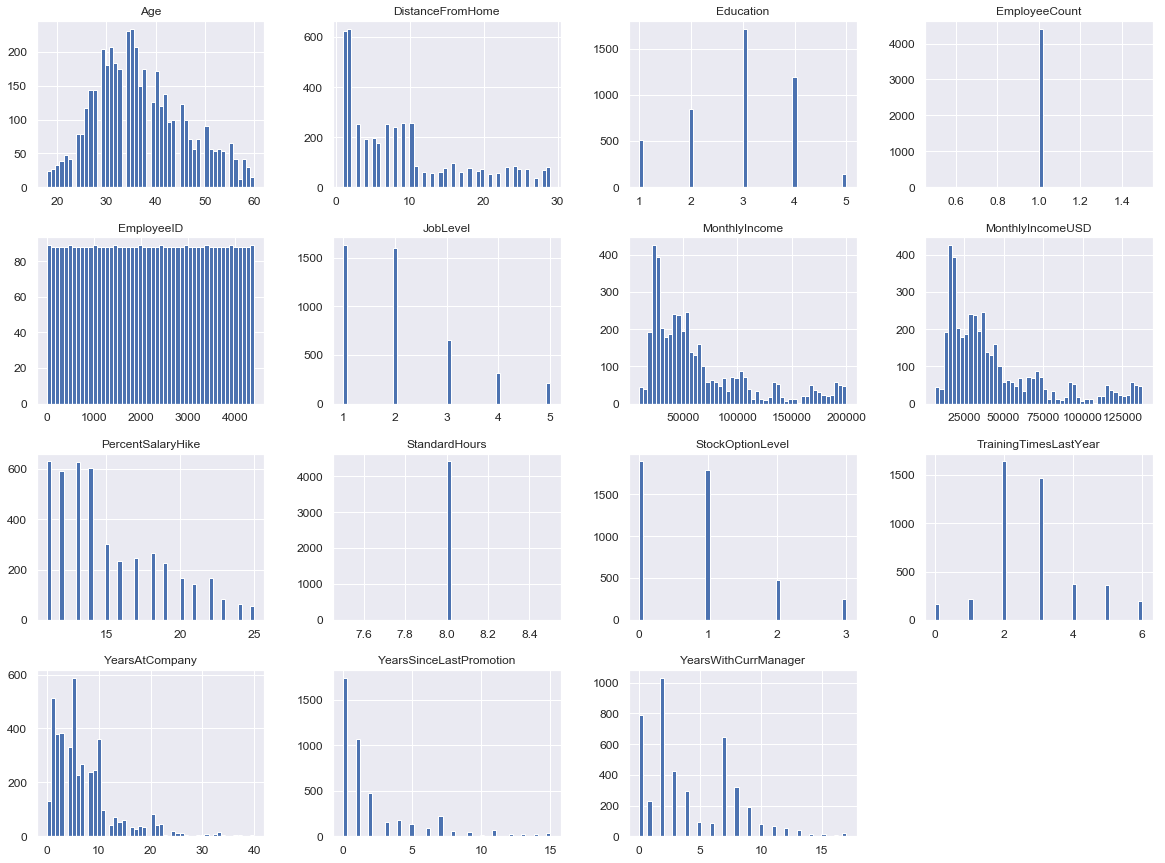

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
# Creates a folder in the current directory called data
createFolder('images')
general_data.hist(bins=50, figsize=(20,15))
plt.savefig('images/general_data.png')
plt.show()

In [24]:
#drop the useless columns:
general_data.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1, inplace = True)

In [25]:
corr_cols = general_data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncomeUSD', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

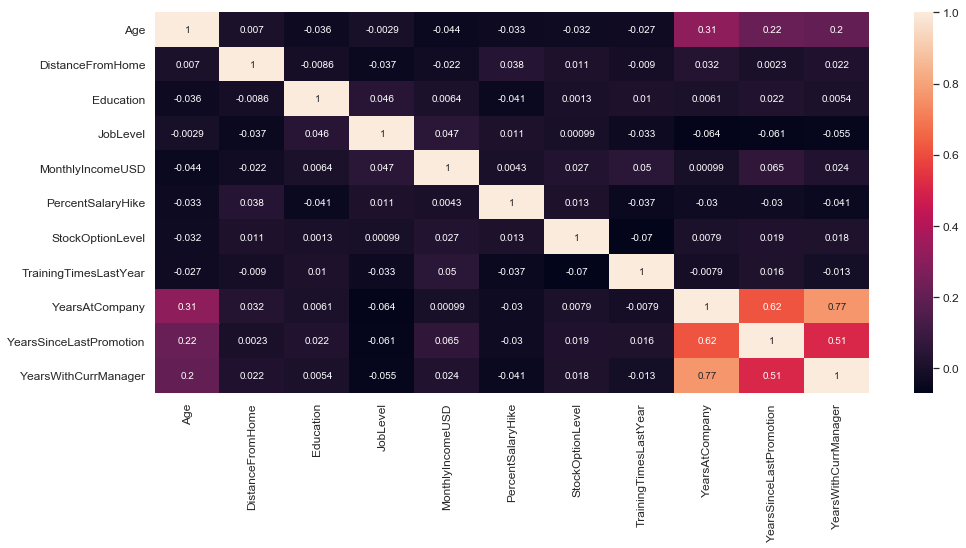

In [26]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [27]:
general_data["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [28]:
attrition_rate = (711/4410)
attrition_rate

0.16122448979591836

In [29]:
general_data["BusinessTravel"].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [30]:
general_data["Department"].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [31]:
general_data["EducationField"].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [32]:
general_data["Gender"].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

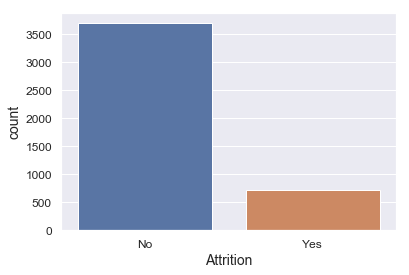

In [33]:
sns.countplot(x = "Attrition",data=general_data)
plt.show()

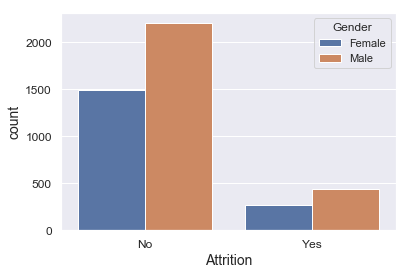

In [34]:
sns.countplot(x = "Attrition",data=general_data,hue="Gender")
plt.show()

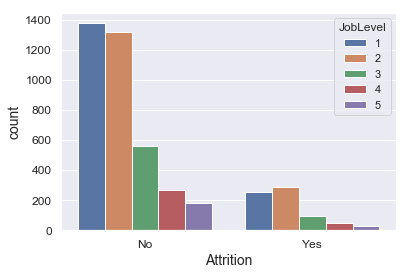

In [35]:
sns.countplot(x = "Attrition",data=general_data,hue="JobLevel")
plt.show()

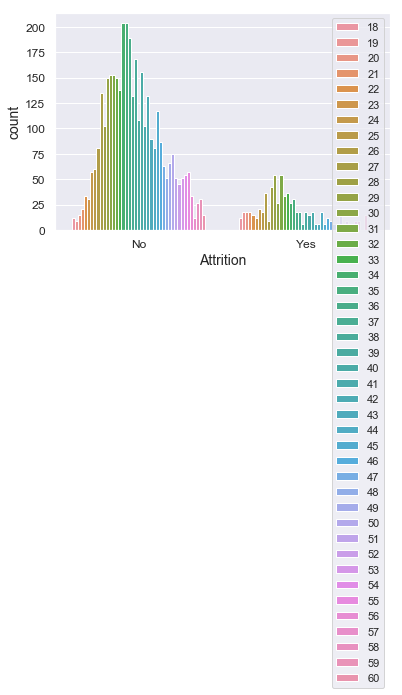

In [36]:
sns.countplot(x = "Attrition",data=general_data,hue="Age")
plt.legend(loc='upper right')
plt.show()

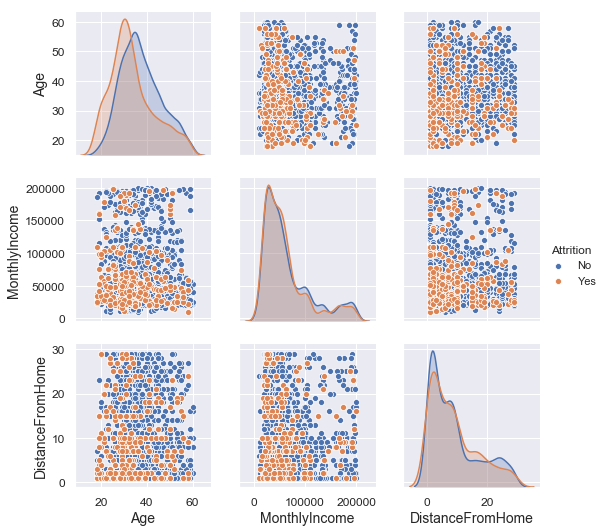

In [37]:
sns.pairplot(general_data[['Age','MonthlyIncome','DistanceFromHome','Attrition']],hue = 'Attrition')

In [62]:
gen_data_num=general_data[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].copy()

In [63]:
gen_data_cat=general_data[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18']].copy()

In [64]:
gen_data_cat=pd.get_dummies(gen_data_cat)
gen_data_cat.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [65]:
gen_data_final=pd.concat([gen_data_num,gen_data_cat],axis=1)

In [66]:
gen_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 42 columns):
Age                                  4410 non-null int64
DistanceFromHome                     4410 non-null int64
Education                            4410 non-null int64
JobLevel                             4410 non-null int64
MonthlyIncome                        4410 non-null int64
NumCompaniesWorked                   4410 non-null object
PercentSalaryHike                    4410 non-null int64
StockOptionLevel                     4410 non-null int64
TotalWorkingYears                    4410 non-null object
TrainingTimesLastYear                4410 non-null int64
YearsAtCompany                       4410 non-null int64
YearsSinceLastPromotion              4410 non-null int64
YearsWithCurrManager                 4410 non-null int64
Attrition_No                         4410 non-null uint8
Attrition_Yes                        4410 non-null uint8
BusinessTravel_Non-Travel           

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(gen_data_final.drop('Attrition',axis=1), 
                                                    gen_data_final['Attrition'], test_size=0.30, 
                                                    random_state=101)

KeyError: "['Attrition'] not found in axis"

In [48]:
Num_val = {'Yes':1, 'No':0}
hr_data_cat['Attrition'] = hr_data_cat["Attrition"].apply(lambda x: Num_val[x])
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,1,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,0,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,0,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,0,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y


In [49]:
hr_data_cat = pd.get_dummies(hr_data_cat)
hr_data_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [50]:
hr_data_final = pd.concat([general_data, hr_data_cat], axis=1)
hr_data_final.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,0,0,0,0,0,0,1,0,1
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,0,0,0,1,0,0,0,0,1,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0,0,0,0,1,0,0,1,0,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,0,0,0,0,0,0,0,1,0,1
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,0,0,0,0,1,0,0,0,1,1


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
y = hr_data_cat['Attrition']
x = hr_data_cat.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)


In [56]:
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)

/Users/siwoolee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
accuracy_score(y_test, test_pred)

0.8701814058956916

In [60]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(15)
feat_importances.plot(kind='barh')

ValueError: Length of passed values is 27, index implies 21